# Regressão Linear Simples - Trabalho

## Estudo de caso: Seguro de automóvel sueco

Agora, sabemos como implementar um modelo de regressão linear simples. Vamos aplicá-lo ao conjunto de dados do seguro de automóveis sueco. Esta seção assume que você baixou o conjunto de dados para o arquivo insurance.csv, o qual está disponível no notebook respectivo.

O conjunto de dados envolve a previsão do pagamento total de todas as reclamações em milhares de Kronor sueco, dado o número total de reclamações. É um dataset composto por 63 observações com 1 variável de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Número de reivindicações.
2. Pagamento total para todas as reclamações em milhares de Kronor sueco.

Voce deve adicionar algumas funções acessórias à regressão linear simples. Especificamente, uma função para carregar o arquivo CSV chamado *load_csv ()*, uma função para converter um conjunto de dados carregado para números chamado *str_column_to_float ()*, uma função para avaliar um algoritmo usando um conjunto de treino e teste chamado *split_train_split ()*, a função para calcular RMSE chamado *rmse_metric ()* e uma função para avaliar um algoritmo chamado *evaluate_algorithm()*.

Utilize um conjunto de dados de treinamento de 60% dos dados para preparar o modelo. As previsões devem ser feitas nos restantes 40%. 

Compare a performabce do seu algoritmo com o algoritmo baseline, o qual utiliza a média dos pagamentos realizados para realizar a predição ( a média é 72,251 mil Kronor).


# Definição das Funções

In [1]:
# Importando Bibliotecas
import csv
import matplotlib.pyplot as plt
from math import sqrt
from random import randrange

In [2]:
# Definição da função que transforma um conjunto de dados inteiro em float
def str_column_to_float(data):
    newData = []
    for lines in data:
        aux = [float(x) for x in lines]
        newData.append(aux)
    return newData

# Definição da função que carrega o arquivo .csv
def load_csv(filename):
    lines = csv.reader(open(filename + ".csv", "r"))
    data = list(lines)
    return str_column_to_float(data)

# Função responsável por separar o Conjunto de Treino de Conjunto de Teste
def split_train_test(data, test_size=0.4):
    dataTrain = list(data)
    dataTest = []
    size = int(len(dataTrain)*test_size)
    for _ in range(size):
        idx = randrange(len(dataTrain))
        dataTest.append(dataTrain.pop(idx))
    return [dataTrain, dataTest]

# Definição da função que calcula média de um conjunto de valores
def mean(values):
    return sum(values)/len(values)

# Definição da função que calcula a variância de um conjunto de valores
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

# Calcula a covariância entre duas variáveis X e Y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

# Calcula os coeficientes da regressão de um data conjunto de dados
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

# Realiza uma Regressão Linear, obtendo os parâmetros por um conjunto de treino
# e realizando predições sobre um conjunto de teste
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        ypred = b0 + b1 * row[0]
        predictions.append(ypred)
    return predictions

# Calcula o valor da métrica RMSE (Root Mean Squared Error)
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Avalia a qualidade de um determinado algoritmo sobre um Dataset utilizando
# o RMSE como métrica
def evaluate_algorithm(train_set, test_set, algorithm):
    predicted = algorithm(train_set, test_set)
    actual = [row[-1] for row in test_set]
    rmse = rmse_metric(actual, predicted)
    return rmse

# Baseline: assume que o valor de resposta é sempre a média dos preços
def baseline(train_set, test_set):
    pays = [row[-1] for row in train_set]
    meanValue = mean(pays)
    predictions = [meanValue for i in range(len(test_set))]
    return predictions


# Utilização da Regressão Linear e Avaliação do Algoritmo

In [3]:
data = load_csv("insurance")
[trainData, testData] = split_train_test(data, test_size=0.4)

coef = coefficients(trainData)
predRegre = simple_linear_regression(trainData, testData)
predBase = baseline(trainData, testData)

avalRegre = evaluate_algorithm(trainData, testData, simple_linear_regression)
avalBase = evaluate_algorithm(trainData, testData, baseline)

print("A Regressão Linear Simples obteve os coeficientes: alfa = {:.2f} e beta = {:.2f}".format(coef[0], coef[1]))
print("O erro RMSE desse algoritmo é {:.2f}".format(avalRegre))
print("O erro RMSE para o baseline (média dos pagamentos) é {:.2f}".format(avalBase))

print("\nPrimeiras 10 predições:")
for i in range(10):
    print("Y real: {:.2f} \t| Y previsto: {:.2f} \t | Y baseline: {:.2f}".format(testData[i][-1], predRegre[i], predBase[i]))

A Regressão Linear Simples obteve os coeficientes: alfa = 15.84 e beta = 3.47
O erro RMSE desse algoritmo é 33.14
O erro RMSE para o baseline (média dos pagamentos) é 89.88

Primeiras 10 predições:
Y real: 48.80 	| Y previsto: 40.16 	 | Y baseline: 97.67
Y real: 40.30 	| Y previsto: 33.21 	 | Y baseline: 97.67
Y real: 194.50 	| Y previsto: 120.08 	 | Y baseline: 97.67
Y real: 87.40 	| Y previsto: 47.11 	 | Y baseline: 97.67
Y real: 77.50 	| Y previsto: 40.16 	 | Y baseline: 97.67
Y real: 142.10 	| Y previsto: 74.91 	 | Y baseline: 97.67
Y real: 14.60 	| Y previsto: 36.69 	 | Y baseline: 97.67
Y real: 39.60 	| Y previsto: 95.75 	 | Y baseline: 97.67
Y real: 137.90 	| Y previsto: 99.23 	 | Y baseline: 97.67
Y real: 55.60 	| Y previsto: 43.63 	 | Y baseline: 97.67


# Visualização da Regressão Linear

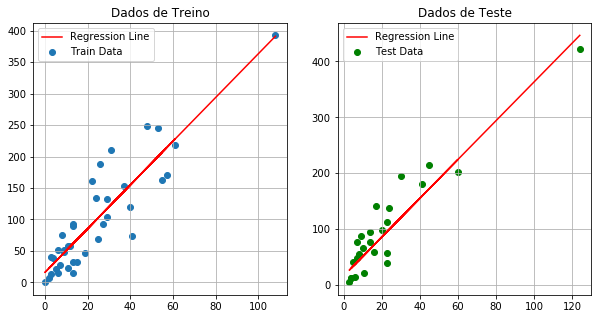

In [4]:
# Separando entrada de saída
X_train = [row[0] for row in trainData]; X_test = [row[0] for row in testData]
Y_train = [row[1] for row in trainData]; Y_test = [row[1] for row in testData]
predTrain = simple_linear_regression(trainData, trainData)
predTest = predRegre

plt.figure(figsize=[10, 5])

plt.subplot(1,2,1); plt.title("Dados de Treino")
plt.scatter(X_train, Y_train, label="Train Data")
plt.plot(X_train, predTrain, 'r-', label="Regression Line")
plt.grid()
plt.legend()

plt.subplot(1,2,2); plt.title("Dados de Teste")
plt.scatter(X_test, Y_test, c="green", label="Test Data")
plt.plot(X_test, predTest, 'r-', label="Regression Line")
plt.grid()
plt.legend()

plt.show()